<a href="https://colab.research.google.com/github/gohelanupam-byte/demo/blob/main/Batch_US_ML%26Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Hello')

Hello


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df

,Name,Monthly Income ($)
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000
6,Elon Musk,10000000


In [ ]:
df.describe()

,Monthly Income ($)
count,7.000000e+00
mean,1.433929e+06
std,3.777283e+06
min,4.000000e+03
25%,5.500000e+03
50%,7.000000e+03
75%,7.750000e+03
max,1.000000e+07


# Removing Outliers -> using percentile method

In [ ]:
df['Monthly Income ($)'].quantile(0.50)

np.float64(7000.0)

In [ ]:
df['Monthly Income ($)'].quantile(0.75)

np.float64(7750.0)

In [ ]:
df['Monthly Income ($)'].quantile(0.10)

np.float64(4600.0)

In [ ]:
# Having income more than 99 percentile

In [ ]:
percentile_99_income = df['Monthly Income ($)'].quantile(0.99)
percentile_99_income

np.float64(9400479.999999994)

In [ ]:
df[df['Monthly Income ($)']>percentile_99_income]

,Name,Monthly Income ($)
6,Elon Musk,10000000


In [ ]:
df_no_outlier = df[df['Monthly Income ($)']<percentile_99_income]

In [ ]:
df_no_outlier

,Name,Monthly Income ($)
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000


In [ ]:
df_no_outlier['price']>df_no_outlier['price'].quantile(0.01)

# Handle Missing Values

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df

,Name,Monthly Income ($)
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,NaN
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,10000000.0


In [ ]:
df['Monthly Income ($)'].mean()

np.float64(1671666.6666666667)

In [ ]:
df['Monthly Income ($)'].median()

6500.0

In [ ]:
df_new = df.fillna(df['Monthly Income ($)'].median())

In [ ]:
df_new

,Name,Monthly Income ($)
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,6500.0
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,10000000.0


In [ ]:
df.describe()

,Monthly Income ($)
count,6.000000e+00
mean,1.671667e+06
std,4.080034e+06
min,4.000000e+03
25%,5.250000e+03
50%,6.500000e+03
75%,7.750000e+03
max,1.000000e+07


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('heights.csv')

In [ ]:
df.head(5)

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [ ]:
df['height'].describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [ ]:
import seaborn as sns

<Axes: xlabel='height', ylabel='Count'>

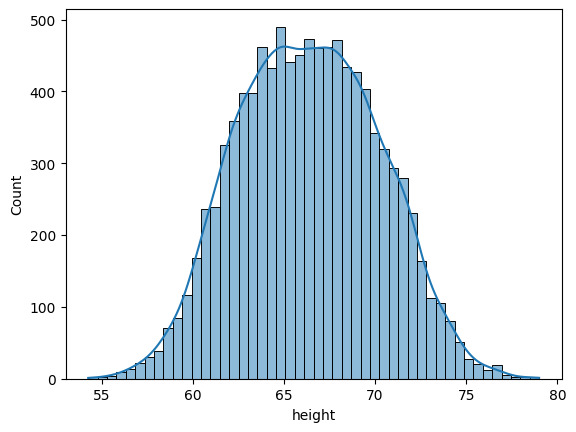

In [ ]:
sns.histplot(df['height'], kde=True)

# Removing Outliers using Standard Deviation

In [ ]:
# Calculate Mean
mean = df['height'].mean()
mean

np.float64(66.367559754866)

In [ ]:
# Std_Deviation
std_deviation = df['height'].std()
std_deviation

3.847528120795573

In [ ]:
# Mean + 3*std
mean + 3*std_deviation

np.float64(77.91014411725271)

In [ ]:
mean - 3*std_deviation

np.float64(54.824975392479274)

In [ ]:
# Outlier People
df[(df['height']>77.91014411725271) | (df['height']<54.824975392479274)] # | -> OR

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [ ]:
df_no_outlier = df[(df['height']<77.91014411725271) & (df['height']>54.824975392479274)] # & -> and
df_no_outlier

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [ ]:
df_no_outlier['height'].describe()

,height
count,9993.000000
mean,66.363856
std,3.835511
min,54.873728
25%,63.505894
50%,66.317755
75%,69.169353
max,77.547186


In [ ]:
df_no_outlier = df[(df['height']<(mean+2*std_deviation)) & (df['height']>(mean-2*std_deviation))] # & -> and
df_no_outlier

,gender,height
0,Male,73.847017
1,Male,68.781904
3,Male,71.730978
4,Male,69.881796
5,Male,67.253016
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [ ]:
df_no_outlier['height'].describe()

,height
count,9652.000000
mean,66.345445
std,3.537247
min,58.680665
25%,63.610410
50%,66.309262
75%,69.062059
max,74.056427


<Axes: xlabel='height', ylabel='Count'>

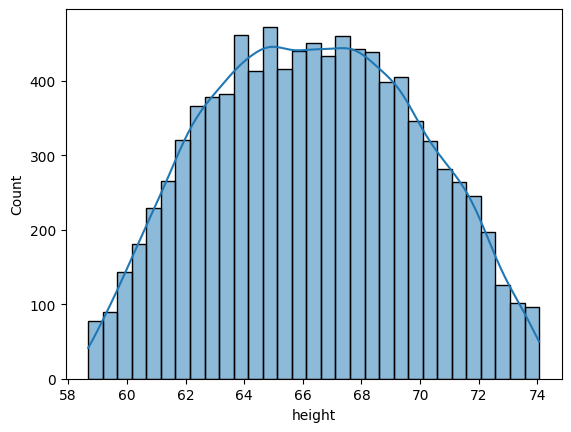

In [ ]:
sns.histplot(df_no_outlier['height'], kde=True)

In [ ]:
# You need to examine price_per_sqft column and do following
# (1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

# On step(1) dataframe, use 4 standard deviation to remove outliers
# Plot graph for new dataframe that is generated


In [ ]:
10**(2.0934216852)

124.00000001078267

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
np.random.seed(0)
income = np.random.exponential(scale=50000, size=100).astype(int)

In [ ]:
income

array([ 39793,  62796,  46161,  39360,  27552,  51907,  28775, 111176,
       165745,  24180,  78444,  37633,  41971, 129912,   3684,   4558,
         1021,  89374,  75289, 102015, 192261,  80261,  30946,  75826,
         6293,  51071,   7736, 144721,  36891,  26778,  15364,  74412,
        30454,  42016,    948,  48069,  47349,  47977, 143895,  57256,
        22275,  28726,  59805,   3105,  54945,  55529,  11810,   6901,
        18948,  22605,  42221,  28866, 222724,   5381,  11715,   8795,
        52937,  14604,  31397,  14013,   8656,   5847,  53403,   7435,
        10944,  23000,  86016,   5107,  90990,   5051, 187451,  31616,
       188096,  46423,  67212,   1998,  16620,   6402,  17558,   6319,
        19135,  26744,   3314,  58959,  41804,  15420,  37037,   4932,
        42894, 132462,  19178,  55042,   7066,  62996,  17082,  10117,
        44156,   1015,  88287,    235])

In [ ]:
df_exp = pd.DataFrame({
    'ID': range(1,101),
    'Income' : income
})

In [ ]:
df_exp

,ID,Income
0,1,58431
1,2,6574
2,3,1584
3,4,1993
4,5,4924
...,...,...
95,96,115749
96,97,35305
97,98,14188
98,99,27688


<Axes: xlabel='Income', ylabel='Count'>

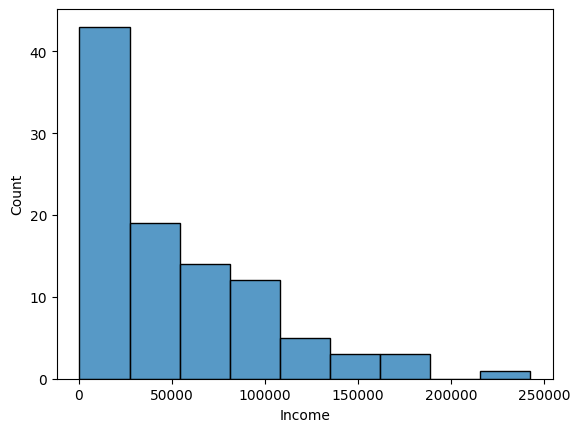

In [ ]:
import seaborn as sns
sns.histplot(df_exp['Income'])

In [ ]:
df_exp['log_income'] = np.log(df_exp['Income'])

In [ ]:
df_exp

,ID,Income,log_income
0,1,58431,10.975602
1,2,6574,8.790878
2,3,1584,7.367709
3,4,1993,7.597396
4,5,4924,8.501876
...,...,...,...
95,96,115749,11.659179
96,97,35305,10.471780
97,98,14188,9.560152
98,99,27688,10.228754


<Axes: xlabel='log_income', ylabel='Count'>

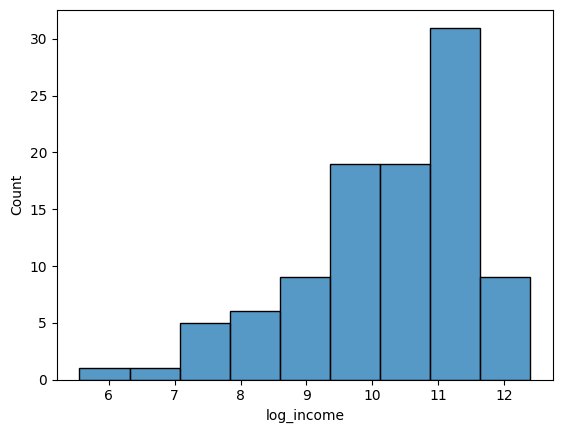

In [ ]:
sns.histplot(df_exp['log_income'])

# Linear Regression


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('homeprices.csv') #Df -> Dataframe -> Table which contains your data

In [ ]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'Price')

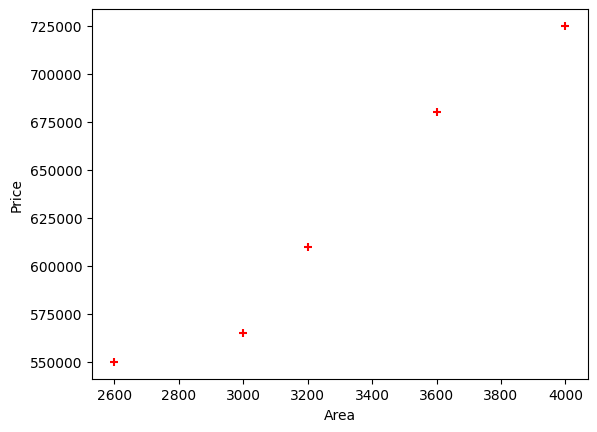

In [ ]:
plt.scatter(df['area'], df['price'], color='red', marker='+')
plt.xlabel('Area')
plt.ylabel('Price')

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
line = LinearRegression()
line.fit(df[['area']], df['price'])

LinearRegression()

In [ ]:
# m -> coefficient
line.coef_

array([135.78767123])

In [ ]:
# c -> intercept
line.intercept_

np.float64(180616.43835616432)

In [ ]:
# Predictions
#Predicted_price = m* Area + c
135.78767123*5000 + 180616.43835616432

859554.7945061643

In [ ]:
line.predict([[5000]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

Text(0, 0.5, 'Price')

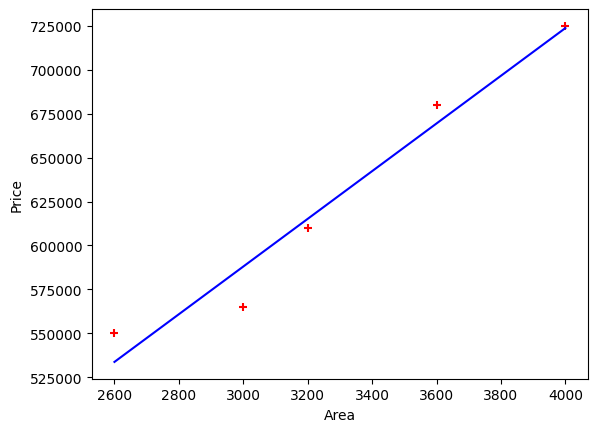

In [ ]:
plt.scatter(df['area'], df['price'], color='red', marker='+')
plt.plot(df['area'], line.predict(df[['area']]), color='blue')
plt.xlabel('Area')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

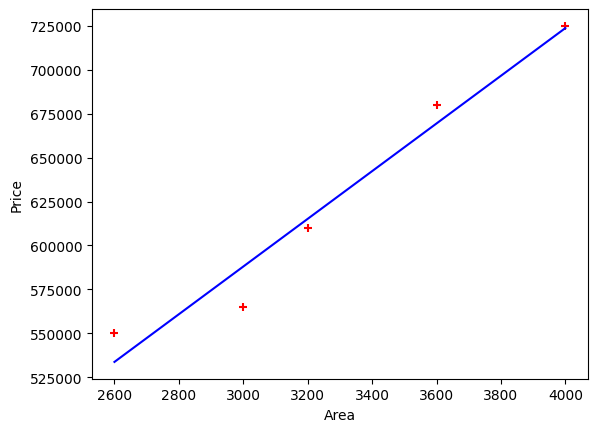

In [ ]:
# What will be the predicted income in 2025
plt.scatter(df['area'],df['price'],marker='+',color='red',label='Actual data pts')
plt.plot(df['area'],line.predict(df[['area']]),color='blue')
plt.xlabel('Area')
plt.ylabel('Price')


Text(0, 0.5, 'Price')

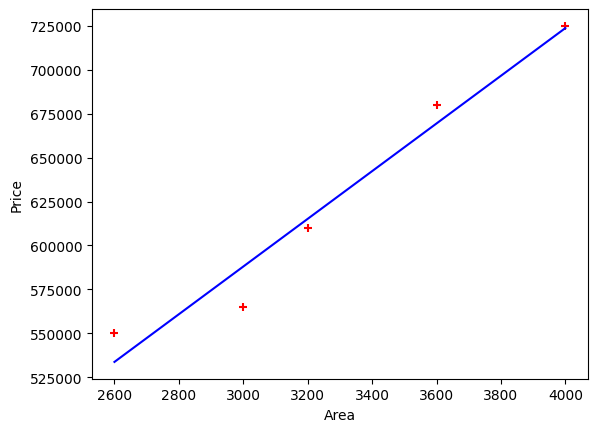

In [ ]:
plt.scatter(df['area'],df['price'],marker='+',color='red',label='Actual data pts')
plt.plot(df['area'],line.predict(df[['area']]),color='blue')
plt.xlabel('Area')
plt.ylabel('Price')

# Multivariate Regression


In [ ]:
df = pd.read_csv('homeprices_multi.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
df['bedrooms'].median()

4.0

In [ ]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

In [ ]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
line = LinearRegression()
line.fit(df[['area', 'bedrooms', 'age']], df['price'])

LinearRegression()

In [ ]:
line.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
line.intercept_

np.float64(221323.00186540402)

In [ ]:
line.predict([[3000, 3, 15]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([579201.19929613])